In [1]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

# Suppress warning that sql connector is not compatible with our database (seems to work fine so far)
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

In [2]:
# Database password
pwd_token_file = open("dbtoken.txt", "r")
pwd_token = pwd_token_file.readline()

In [3]:
# Open connection to database
database = connection.connect(
	host = "sumerian-social-network.clzdkdgg3zul.us-west-2.rds.amazonaws.com",
	database = "sumerianDB",
	user = "root",
	password = pwd_token
)

query = f"Select sequence, sumerianDB.bestyears.year, count(sumerianDB.bestyears.year) from sumerianDB.bestyears inner join sumerianDB.yearsequence on sumerianDB.bestyears.year = sumerianDB.yearsequence.year group by sequence;"
# Query the database
queryResult = pd.read_sql(query, database)

database.close()

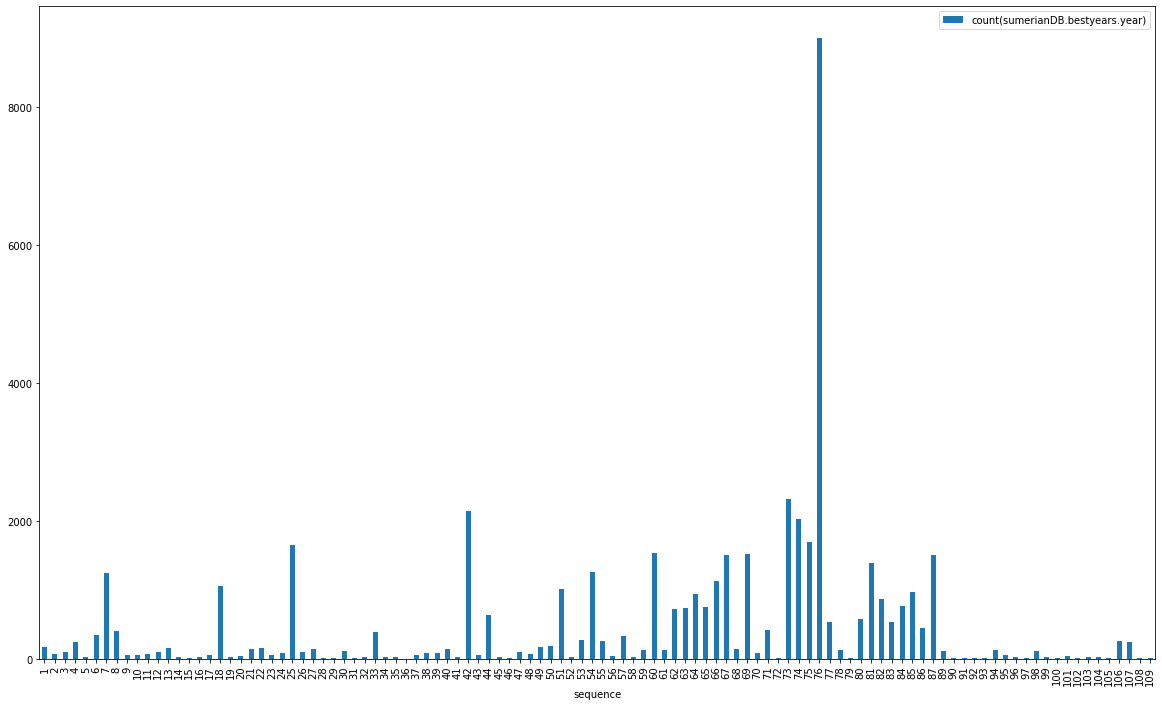

In [4]:
queryResult["sequence"] = queryResult["sequence"].astype(int)
queryResult.head()

plotdf = queryResult.sort_values("sequence")
plt.rcParams["figure.figsize"] = (20,12)
ax = plotdf.plot.bar("sequence", "count(sumerianDB.bestyears.year)")


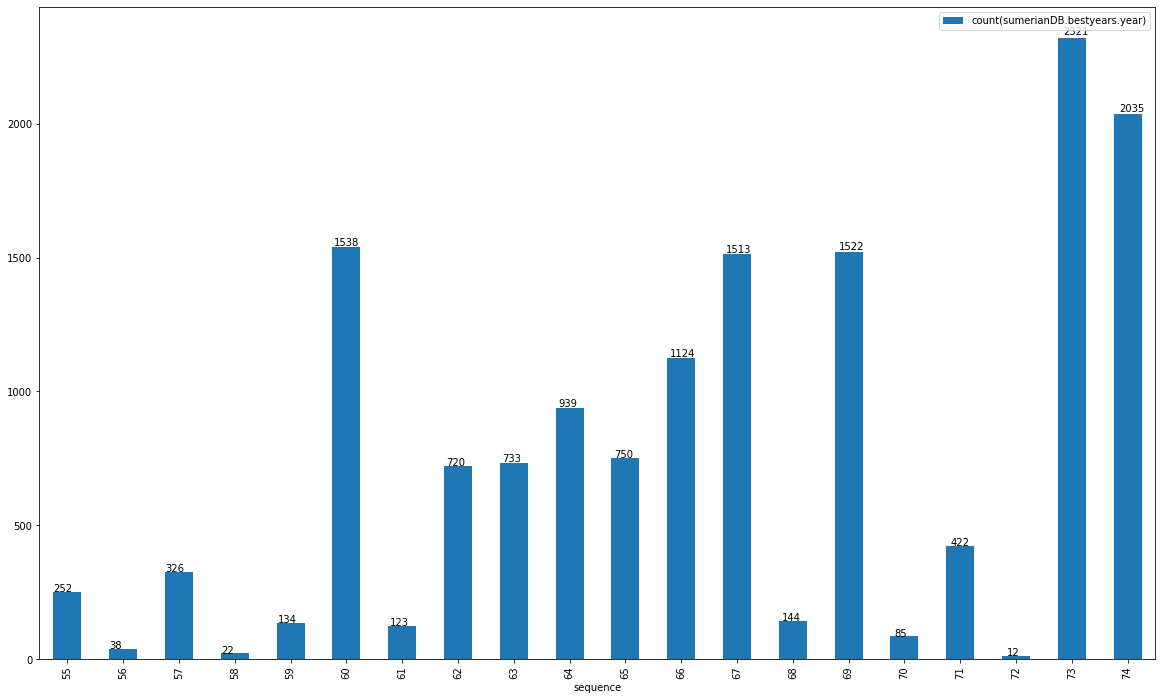

In [5]:
plotdf = queryResult.sort_values("sequence")
plotdf = plotdf[plotdf.sequence < 75]
plotdf = plotdf[plotdf.sequence > 54]

plt.rcParams["figure.figsize"] = (20,12)
ax = plotdf.plot.bar("sequence", "count(sumerianDB.bestyears.year)")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


In [6]:
noun = "textile"

# Open connection to database
database = connection.connect(
	host = "sumerian-social-network.clzdkdgg3zul.us-west-2.rds.amazonaws.com",
	database = "sumerianDB",
	user = "root",
	password = pwd_token
)

year_sequence = pd.read_sql("SELECT * FROM sumerianDB.yearsequence", database)
database.close()

database = connection.connect(
	host = "sumerian-social-network.clzdkdgg3zul.us-west-2.rds.amazonaws.com",
	database = "sumerianDB",
	user = "root",
	password = pwd_token
)

query = f"SELECT * FROM sumerianDB.nouns inner join sumerianDB.bestyears ON sumerianDB.nouns.tabid = sumerianDB.bestyears.tabid where (translated like \"%sheep%\"	or translated like \"%lamb%\" or translated like \"%beer%\" or translated like \"%barley%\" or translated like \"%bread%\" or translated like \"%oil%\" or translated like \"%ox%\" or translated like \"%garlic%\" or translated like \"%potash%\" or translated like \"%goat%\" or translated like \"%textile%\") group by translated order by COUNT(translated) desc;"
# Query the database
queryResult = pd.read_sql(query, database)

database.close()

['sheep', 'lamb', 'fleeced_sheep', 'sheep_fat', 'female_lamb', 'fat-tailed_sheep']
['beer_malt', 'beer', 'beer-making_ingredient']
['barley']
['bread']
['oil', 'oil_ration', 'fish_oil']
['ox', 'draught_ox', 'plow_ox']
['garlic']
['potash']
['goat', 'goat_wool', 'male_goat']
['textile', 'textile_ration']

In [7]:
simpleNounsData = {
    'simpleNoun': [ 'sheep', 'sheep', 'sheep', 'sheep', 'sheep', 'sheep',
                    'beer', 'beer', 'beer',
                    'barley',
                    'bread',
                    'oil', 'oil', 'oil',
                    'ox', 'ox', 'ox',
                    'garlic',
                    'potash',
                    'goat', 'goat', 'goat',
                    'textile', 'textile'],

    'translated': [ 'sheep', 'lamb', 'fleeced_sheep', 'sheep_fat', 'female_lamb', 'fat-tailed_sheep',
                    'beer_malt', 'beer', 'beer-making_ingredient',
                    'barley',
                    'bread',
                    'oil', 'oil_ration', 'fish_oil',
                    'ox', 'draught_ox', 'plow_ox',
                    'garlic',
                    'potash',
                    'goat', 'goat_wool', 'male_goat',
                    'textile', 'textile_ration']
}

simpleNounsDF = pd.DataFrame(data=simpleNounsData)
simpleNounsDF.head()

,simpleNoun,translated
0,sheep,sheep
1,sheep,lamb
2,sheep,fleeced_sheep
3,sheep,sheep_fat
4,sheep,female_lamb


comboDF = queryResult.merge(year_sequence, how='left')
comboDF = comboDF.merge()
comboDF["translated"] = comboDF["translated"].str.split("[", expand=True)[1].str.split("]", expand=True)[0][:-1]
comboDF["translated"].unique()

In [8]:
comboDF = queryResult.merge(year_sequence, how='left')
comboDF["translated"] = comboDF["translated"].str.split("[", expand=True)[1].str.split("]", expand=True)[0][:-1]
comboDF = comboDF.merge(simpleNounsDF, how='left')
print(comboDF["translated"].unique())
comboDF.head()

['sheep' 'barley' 'beer' 'ox' 'lamb' 'bread' 'oil' 'goat' 'garlic'
 'potash' 'textile' 'female_lamb' 'ox_overseer' 'fat-tailed_sheep'
 'draught_ox' 'sheep_type' 'fleeced_sheep' 'sheep_designation' 'beer_malt'
 'male_goat' 'goat_wool' 'sheephouse' 'oil_ration'
 'beer-making_ingredient' 'fish_oil' 'ox_driver' 'sheep_fat' 'plow_ox'
 'textile_ration' 'textile_distribution' nan]


,tabid,raw,translated,year,tabid,similarity,rawyear,sequence,simpleNoun
0,P100026,udu,sheep,su-suen 2a,P100026,57.0,mu us2-sa,76\r\n,sheep
1,P100001,sze,barley,amar-sin 4b,P100001,77.0,mu en-mah-gal-an-na en-dnanna ba-hun-ga2,69\r\n,barley
2,P100019,kasz,beer,amar-sin 8a,P100019,73.0,mu us2-sa hu-uh2-nu-riki,73\r\n,beer
3,P100001,gu4,ox,amar-sin 4b,P100001,77.0,mu en-mah-gal-an-na en-dnanna ba-hun-ga2,69\r\n,ox
4,P100029,sila4,lamb,su-suen 2a,P100029,57.0,mu us2-sa,76\r\n,sheep


In [15]:
selectDF = comboDF.groupby(['year', 'sequence'])[['sequence', 'year', 'simpleNoun']]
selectDF.head()

,sequence,year,simpleNoun
0,76\r\n,su-suen 2a,sheep
1,69\r\n,amar-sin 4b,barley
2,73\r\n,amar-sin 8a,beer
3,69\r\n,amar-sin 4b,ox
4,76\r\n,su-suen 2a,sheep
5,73\r\n,amar-sin 8a,bread
6,73\r\n,amar-sin 8a,oil
7,44\r\n,sulgi 27b,goat
8,73\r\n,amar-sin 8a,garlic
9,73\r\n,amar-sin 8a,potash


In [ ]:
countsDF = selectDF.groupby()

In [10]:
ax = selectDF.plot.bar('simpleNoun','counts')
ax.set_xticklabels(comcountDF['year'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.5, p.get_height() + 15), rotation='90')

ax.set_title('goods')
ax.set_xlabel('Sequential Date')
ax.set_ylabel('Count')

print('dummy')

KeyError: 'counts'